In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import LSTM

In [42]:
stock = "TSLA"
df = pd.DataFrame(yf.download(stock, '2020-01-01', '2022-12-31')["Close"])

[*********************100%***********************]  1 of 1 completed


In [14]:
df  = pd.read_excel("D:/KTrinh/R/time_series/Data/VN_GDP_2020.xlsx")

In [17]:
df.dropna(inplace=True)

In [37]:
def rolling(lag, data):
    A = []
    df = data.values
    for i in range(lag, len(df)):
        A.append(df[i-lag:i]) 
    return A

def train_test_split(x,y,test_size):
    i = int(len(x)*test_size)
    j = int(len(y)*test_size)
    return x[:i], x[i:], y[:j], y[j:]

def RNN(x, y, lag):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(lag,1)))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=50))
    model.add(Dropout(0.3))
    model.add(Dense(units=1))

    #RMSProp is working fine with LSTM but so do ADAM optimizer
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(np.array(x), np.array(y), epochs=100, batch_size=32)
    return model

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data = pd.DataFrame(scaler.fit_transform(df["Close"].values.reshape(-1,1)))
data

,0
0,0.011927
1,0.014130
2,0.015604
3,0.018631
4,0.022618
...,...
751,0.256729
752,0.220319
753,0.229674
754,0.253282


In [45]:
lag = 5
A = rolling(lag, data)
b = data.values[lag::]

deon, dete, keyon, keyte = train_test_split(A,b, test_size=0.5)

In [46]:
a = RNN(deon,keyon,lag)

Epoch 1/100
12/12 [==============================] - 16s 42ms/step - loss: 0.0834
Epoch 2/100
12/12 [==============================] - 1s 42ms/step - loss: 0.0329
Epoch 3/100
12/12 [==============================] - 1s 44ms/step - loss: 0.0138
Epoch 4/100
12/12 [==============================] - 1s 44ms/step - loss: 0.0063
Epoch 5/100
12/12 [==============================] - 1s 44ms/step - loss: 0.0056
Epoch 6/100
12/12 [==============================] - 0s 35ms/step - loss: 0.0043
Epoch 7/100
12/12 [==============================] - 0s 40ms/step - loss: 0.0041
Epoch 8/100
12/12 [==============================] - 1s 43ms/step - loss: 0.0037
Epoch 9/100
12/12 [==============================] - 1s 45ms/step - loss: 0.0038
Epoch 10/100
12/12 [==============================] - 1s 46ms/step - loss: 0.0036
Epoch 11/100
12/12 [==============================] - 1s 46ms/step - loss: 0.0034
Epoch 12/100
12/12 [==============================] - 1s 45ms/step - loss: 0.0031
Epoch 13/100
12/12 [====

24/24 [==============================] - 3s 18ms/step


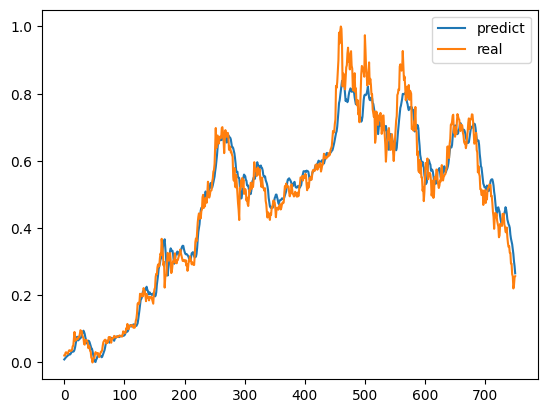

In [47]:
p =a.predict(np.array(A))
plt.plot(p, label="predict")
plt.plot(np.array(b), label="real")
plt.legend()
plt.show()

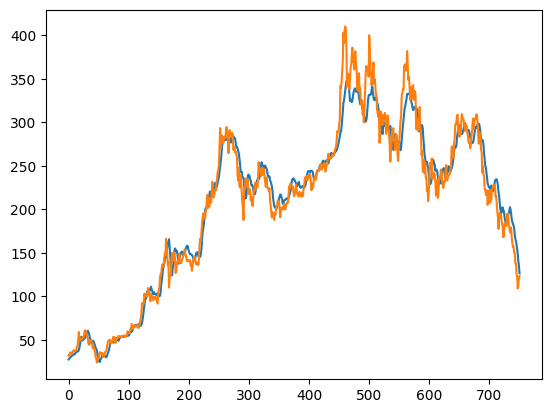

In [48]:
plt.plot(scaler.inverse_transform(p))
plt.plot(scaler.inverse_transform(b))

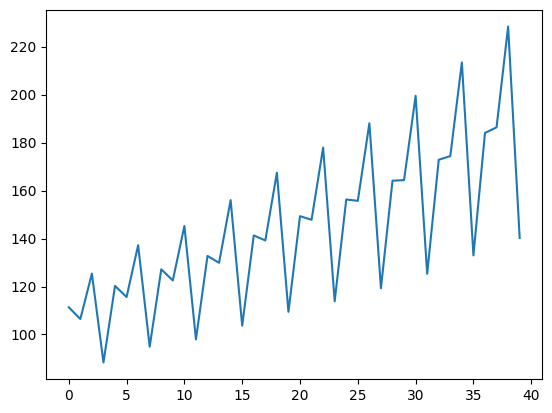

In [19]:
plt.plot(keyon)